<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada 2021</h1>
<h2>Pràctica 1 - Grafs, Dijkstra</h2>
</center>
</div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from IPython.display import display, Math, Latex

<div class="alert alert-info">
<h2>Avís general per a les Pràctiques de Laboratori</h2>

És molt important <b>comentar tot el vostre codi</b>. Comentar el codi no només facilita a altres persones que el llegeixin la compressió del que esteu fent, sinó també a vosaltres mateixos durant el procés de disseny i implementació. D'aquesta forma podreu entendre el vostre propi codi encara que faci molt temps que no el consulteu. A més, a l'hora de ser corregits, un codi comentat s'entén molt millor, la qual cosa ajuda a traslladar al professor les idees que teníeu a l'intentar implementar-lo i encara més en el cas que no ho hagueu pogut acabar-ho amb èxit. No cal comentar cada línia, però si el que fa cada part.

En segon lloc, és molt important <b>respectar les capçaleres de les funcions i estructura de la funció ```return```</b> que s'indiquin a l'enunciat. Tot i que llegim i corregim els vostres codis en detall, fem servir correctors automàtics per guiar i agilitzar el procés i saber quines solucións funcionen i quines no ja d'entrada. 

Axí doncs, si es demana que la funció tingui la següent estructura: 

```python
def exercici1(param1, param2):
    # implementació de la solució
    return resultat 
```

És important que en el notebook existeixi aquesta funció i que no canvieu el nom dels paràmetres ni el tipus de dada retornada.
    
</div>




## maze.py

La llibreria auxiliar ```maze.py```, conté les funcions necessàries per crear i dibuixar laberints aleatoris. A continuació destaquem les funcions més rellevants tot i que podeu obrir el fitxer i investigar.

- ```Maze(x_num, y_num, seed=None, p_down=0.2, p_build=0)```: Aquesta funció construeix i retorna un laberint aleatori de dimensió $x_\text{num} \times y_\text{num}$. El paràmetre $\textit{seed}$ permet fixar una llavor de forma que sempre es generi el mateix laberint. És interessant que, un cop hagueu programat la solució dels exercicis, proveu de modificar-lo per veure que funciona en diferents casos. Els paràmetres $p_\text{down}$ i $p_\text{build}$ són probabilitats de destrucció d'una paret o de construcció. Així, si $p_\text{down}$ és proper a 1, s'eliminen gairebé totes les parets del laberint, creant molts camins entre totes les cel·les. En canvi, si $p_\text{build}$ és proper a 1, es crearan parets que faran que el laberint no tingui solució per a gairebé cap parella de cel·les.

- ```maze.display_maze(height=200, plot_path=False)```: Com el seu nom indica, ens mostra el laberint que hem creat. Podem definir l'alçada del dibuix i l'amplada s'ajusta automàticament. Com veurem, podem assignar un camí a cada laberint. Si hi ha un camí assignat, el podem mostrar cridant la funció amb la variable _plot\_path = True_.

- ```maze.maze_graph()```: Aquesta funció, que no rep cap paràmetre per entrada, ens retorna un graf de la classe nx.Graph() que representa el laberint.

- ```maze.set_path(path)```: Donat un camí definit com una sequència de nodes, el podem assignar al laberint usant aquesta funció. Recorda que si vols visualitzar un camí assignat, pots fer-ho cridant a ```display_maze(plot_path=True)```.

In [3]:
from matplotlib import pyplot as plt
import networkx as nx
from maze import *

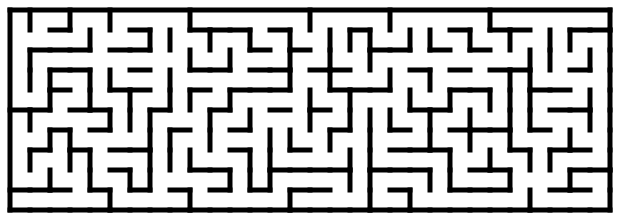

In [4]:
# Creem un laberint amb X cel·les horitzontals i Y cel.les verticals i el mostrem.
# Observeu que hem definit un 'seed'. Això vol dir que, tot i que el laberint es genera de forma aleatòria,
# tindreu tots el mateix.
maze = Maze(30, 10, seed=17)
maze.display_maze(height=200)

La longitud del camí mínim és 53


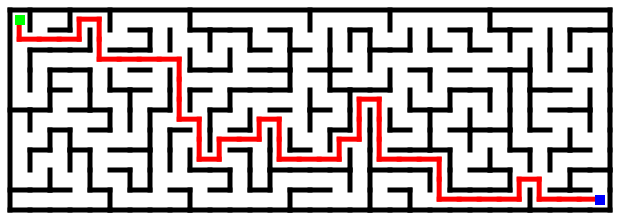

In [5]:
# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
G = maze.maze_graph()

# La llibreria networX ja té una funció per trobar el camí mínim
A = 0                              # Node orígen (Verd) 
B = len(G.nodes)-1                 # Node destí  (Blau)
pth = nx.shortest_path(G, A, B)
print('La longitud del camí mínim és',len(pth))

# Afegim aquest camí al nostre laberint
maze.set_path(pth)

# Mostrem el resultat
maze.display_maze(plot_path=True, height=200)

In [6]:
print(pth)

[0, 30, 31, 32, 33, 3, 4, 34, 64, 65, 66, 67, 68, 98, 128, 158, 159, 189, 219, 220, 190, 191, 192, 162, 163, 193, 223, 224, 225, 226, 196, 197, 167, 137, 138, 168, 198, 228, 229, 230, 231, 261, 291, 292, 293, 294, 295, 265, 266, 296, 297, 298, 299]


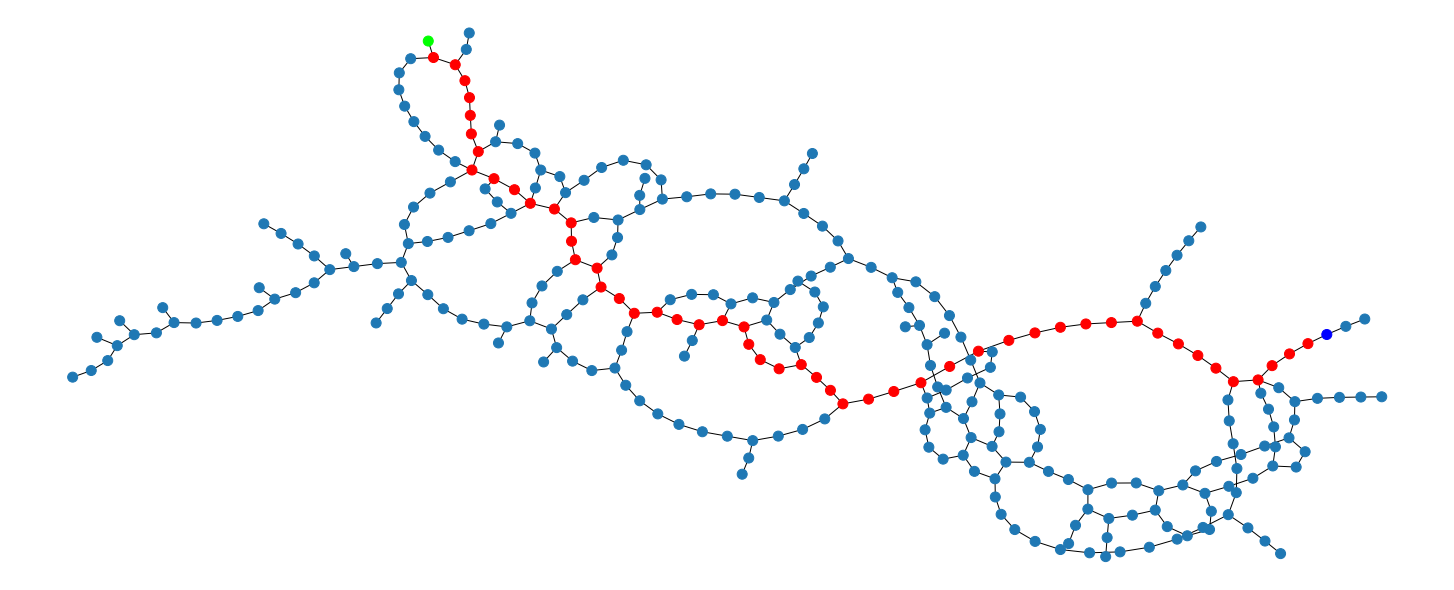

In [7]:
# Mostrem el laberint com un graf.
plt.figure(figsize=(20,8))

# Definim el color dels nodes.
# Si el node és el punt A (inici) el pintem verd, si es el node B (final) el pintem blau, si es un node del camí, vermell i finalment
# deixem el color per defecte de networkx per a la resta de nodes.

colorA, colorB, colorPTH, colorDEF = '#00ff00', '#0000ff', '#ff0000', '#1f78b4'
color_map = [colorA if n==A else colorB if n==B else colorPTH if n in pth else colorDEF for n in G.nodes]

# Existeixen moltes formes diferents de dibuixar els graphs. La Kamada-Kawai ens permet veure el graf com un 'graf de força'.
# Aquests tipus de visualitzacions intenten que les arestes no se superposin.
pos = nx.kamada_kawai_layout(G).items()

# Com que estem dibuixant en horitzontal, canviem les coordenades x i y de cada punt.
pos = {k: v[::-1] for k,v in pos}

# Dibuixem el graf definint la posició, el color i la mida de cada node.
nx.draw(G, pos=pos, node_color=color_map, node_size=100)

<div class="alert alert-success">
<h1>Problema 1: Dijkstra</h1>
<p>
    Implementeu l'algorisme <b>Dijkstra</b>. Donat un graf de la llibreria networX, la funció <b>dijkstra()</b> ha de retornar, si existeix, el camí mínim entre dos nodes. <br>
    A la capçalera del mètode s'expliquen els paràmetres d'entrada i els paràmetres de sortida de la funció. <br>
    Recordeu que és necessari <b>no canviar l'estructura de la funció</b>. No canvieu ni el nom de la funció, ni el nom dels paràmetres d'entrada ni els de sortida. <br>
    - <b>Quina complexitat té aquest algorisme?</b>
</p>    
    
</div>

In [8]:
import heapq as h; # pel minheap

In [9]:
# En Python, podeu representar l'infinit com a float('inf')
def dijkstra(G, origin, destination):
    """
    Params
    ======    
    :G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    :destination: Índex del node destí
    
    Returns
    =======
    Un diccionari amb tres elements:
    
    :path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination'.
    :expanded: El nombre de nodes que s'han visitat per trobar la solució
    :distance: La distancia del camí mínim entre 'origin' i 'destination'    
    """
    # INICIALITZACIÓ DE VARIABLES
    length = len(G.nodes); # Mida de la llista de nodes
    minheap = [];          # minheap
    dist = {};             # diccionari buit de valors actuals d'alarma
    prev = {};             # diccionari buit de nodes previs
    counter = 0;           # ens ajudarà amb expanded
    
    h.heapify(minheap);
    
    # Iterem per la llista de nodes, omplim dist i prev
    for node in G.nodes:
        if(node != origin):
            dist[node] = float('inf');
            h.heappush(minheap,(float('inf'),node));
        else:
            dist[node] = 0;
            h.heappush(minheap,(0,node));
        prev[node] = -1;
    
    # Cos del programa
    while(bool(minheap)):
        actual = h.heappop(minheap)[1];
        if actual == destination: break; # si no posem aquesta condició fallarà el programa
        counter += 1;
        for dest in G.neighbors(actual):
            val = G[actual][dest]['weight'] if 'weight' in G[actual][dest] else 1;
            if(dist[dest] > dist[actual]+val):
                dist[dest] = dist[actual]+val;  
                prev[dest] = actual;
                h.heappush(minheap,(dist[dest],dest));
                
    # Per confeccionar la llista del camí
    path = [destination];
    while prev[path[-1]] != -1:
        path.append(prev[path[-1]]);
    path.reverse();
    
    return {
        'path': path,
        'expanded': counter,
        'distance': len(path) # he considerat la longitud del camí com el nombre de nodes del camí
    }

[0, 30, 31, 32, 33, 3, 4, 34, 64, 65, 66, 67, 68, 98, 128, 158, 159, 189, 219, 220, 190, 191, 192, 162, 163, 164, 194, 195, 225, 226, 196, 197, 167, 137, 138, 168, 198, 228, 229, 230, 231, 261, 291, 292, 293, 294, 295, 265, 266, 296, 297, 298, 299]
La distància del camí més curt és: 53
Els nodes que hem expandit són: 292


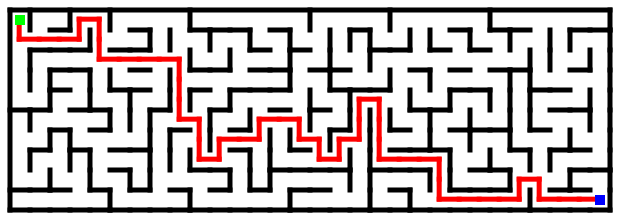

In [10]:
# Proveu el vostre algorisme!

# Creem un laberint i n'extraiem el graph
maze = Maze(30, 10, seed=17)
G = maze.maze_graph()

# Punt inici i punt final
A = 0
B = len(G.nodes)-1

# Cridem a la funció que heu creat
values = dijkstra(G, A, B)

print(values['path'])
print('La distància del camí més curt és:', values['distance'])
print('Els nodes que hem expandit són:', values['expanded'])

# Mostrem el camí
maze.set_path(values['path'])
maze.display_maze(plot_path=True, height=200)

<div class="alert alert-success">
<h1>Problema 2: Checkpoint</h1>
<p>
    Implementeu una funció anomenada <b>checkpoint()</b> que, donat un graf, un node origen, un node destí i un node extra, trobi el camí més curt des del node origen fins el node destí passant pel node extra.<br>
    - <b>Quina és la complexitat d'aquest algorisme?</b><br>
</p>    
    
</div>

In [38]:
def checkpoint(G, origin, destination, extra):
    """
    Params
    ======
    :G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    :destination: Índex del node destí
    :extra: Índex d'un node extra per on ha de passar el camí
    
    Returns
    =======
    Un diccionari amb dos elements:
    
    :path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination' que passa per 'extra'.
    :distance: La distància del camí.
    """
    # LEMA: el camí A-B-C més curt és el camí A-B més curt juntament amb el B-C més curt.
    # DEMOSTRACIÓ: és trivial, no fa falta.
    first = dijkstra(G, origin, extra)['path'];
    second = dijkstra(G, extra, destination)['path'][1:];
    return {'path': first+second, 
            'distance': len(first+second)}

La distàcia del camí més curt que passa per E és: 57
[0, 30, 31, 32, 33, 3, 4, 34, 64, 65, 66, 67, 68, 98, 99, 100, 101, 71, 72, 73, 43, 42, 12, 13, 14, 44, 45, 15, 16, 46, 76, 77, 107, 108, 78, 79, 109, 139, 138, 168, 198, 228, 229, 230, 231, 261, 291, 292, 293, 294, 295, 265, 266, 296, 297, 298, 299]


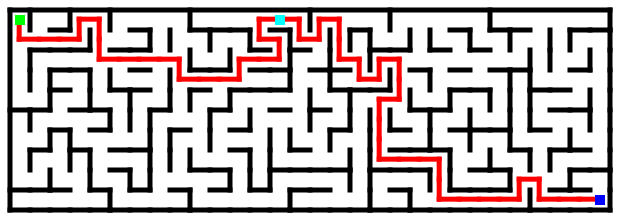

In [40]:
# Proveu el vostre algorisme!

# Creem un laberint i n'extraiem el graph
maze = Maze(30, 10, seed=17)
G = maze.maze_graph()

# Definim l'inici, el fi i un node extra
A = 0
B = len(G.nodes)-1
E = 13

# La funció set_value ens permet 'activar' un node per a que surti dibuixat al laberint.
maze.set_value(E, 1)

values = checkpoint(G, A, B, E)
print('La distàcia del camí més curt que passa per E és:', values['distance'])
print(values['path'])
maze.set_path(values['path'])
maze.display_maze(plot_path=True, height=200)

# De la mateixa forma la funció set_value també ens permet 'desactivar' els nodes.
maze.set_value(E, 0)

<div class="alert alert-success">
<h1>Problema 3: Checkpoints list</h1>
<p>
    Implementeu una funció anomenada <b>checkpoints_list()</b> que, donat un graf, un node origen, un node destí i una llista de nodes extres, trobi el camí més curt des del node origen fins el node destí passant per tots els nodes extra, en qualsevol ordre.<br>
    - <b>Quina és la complexitat d'aquest algorisme?</b><br>
</p>    
    
</div>

In [13]:
# AQUESTA ÉS LA MEVA PRIMERA IDEA, NO FUNCIONAL I NO FINAL, DE COM SOLUCIONAR EL PROBLEMA
def checkpoints_list_primeraidea(G, origin, destination, extras):
    """
    Params
    ======
    :G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    :destination: Índex del node destí
    :extras: Llista d'índexs de nodes per on ha de passar el camí.
    
    Returns
    =======
    Un diccionari amb dos elements:
    
    :path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination' que passa per tots els nodes 'extras'.
    :distance: La distància del camí.
    """
    # EL CONCEPTE ÉS ANÀLEG AL DE L'EXERCICI ANTERIOR, ho hem de generalitzar per a n crides de Dijkstra
    # Per fer-ho més elegant, treballarem amb una llista amb tots els nodes i no sols els extres
    # Hem de crear el camí més curt entre tots els extres, és a dir, un Dijkstra de Dijkstres!
    
    # INICIALITZACIÓ DE VARIABLES
    nodes = [origin] + extras + [destination];
    counter = 0;                     # ens ajudarà amb expanded
    minheap = [(0,origin)];          # minheap
    not_visited = nodes;
    paths = {node: dijkstra(G,origin,node)['path'] for node in nodes};
    dist = {node: dijkstra(G,origin,node)['distance'] if node != origin else 0 for node in nodes};
    
    h.heapify(minheap);
        
    # Cos del programa
    while(bool(minheap)):
        actual = h.heappop(minheap)[1];
        if actual == destination: break; # si no posem aquesta condició fallarà el programa
        for dest in nodes:
            if dest != actual:
                val = 1; # G[actual][dest]['weight'] if 'weight' in G[actual][dest] else 1;
                if(dist[dest] > dist[actual]+val):
                    not_visited.remove(dest);
                    if dest != destination or bool(not_visited):
                        dist[dest] = dijkstra(G,actual,dest)['distance'];
                        paths[dest] = dijkstra(G,actual,dest)['path'];
                    else: # forçar cap el node no visitat més proper
                        di = {alternative: dijkstra(G,actual,alternative)['distance'] 
                              for alternative in not_visited};
                        dest = min(di,key=di.get);
                        dist[dest] = min(di.values());
                        paths[dest] = dijkstra(G,actual,dest)['path'];
                    h.heappush(minheap,(dist[dest],dest)); 
                    
    # Per confeccionar la llista del camí
    path = paths[destination];
    while path[0] != origin:
        path = paths[path[0]] + path;
    path.reverse();
    
    return {
        'path': path,
        'distance': len(path)}

In [14]:
from itertools import permutations

In [36]:
def checkpoints_list(G, origin, destination, extras):
    """
    Params
    ======
    :G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    :destination: Índex del node destí
    :extras: Llista d'índexs de nodes per on ha de passar el camí.
    
    Returns
    =======
    Un diccionari amb dos elements:
    
    :path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination' que passa per tots els nodes 'extras'.
    :distance: La distància del camí.
    """
    
    # EL CONCEPTE ÉS ANÀLEG AL DE L'EXERCICI ANTERIOR
    nodes = [origin]+extras+[destination];
    paths = [element for element in list(permutations(nodes,len(nodes))) if element[0] == origin and element[-1] == destination];
    
    # Diccionari que conté key:value tal que tupla_cami_nodes:path_total_entre_nodes
    dicc = {tupl:[item for sublist in [dijkstra(G,tupl[i],tupl[i+1])['path'][0:-1] for i in range(len(tupl)-1)] for item in sublist] for tupl in paths};
    
    return {
        'path': dicc[min(dicc,key = lambda ele:len(dicc[ele]))]+[destination], # hem d'agafar l'element del diccionari amb un path més curt
        'distance': len(dicc[min(dicc,key = lambda ele:len(dicc[ele]))]+[destination])}

[0, 30, 31, 32, 33, 3, 4, 34, 64, 65, 66, 67, 68, 98, 128, 158, 159, 189, 219, 220, 221, 251, 281, 282, 283, 253, 254, 255, 256, 286, 287, 257, 227, 197, 196, 226, 225, 195, 194, 164, 134, 104, 74, 75, 45, 15, 16, 17, 18, 48, 49, 19, 20, 21, 51, 52, 82, 83, 113, 114, 144, 174, 173, 143, 142, 172, 171, 201, 202, 232, 233, 203, 204, 234, 235, 265, 266, 296, 297, 298, 299]
La distàcia del camí més curt que passa per E és: 81


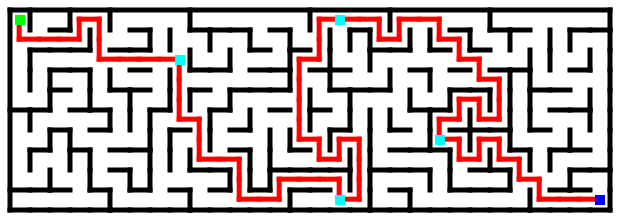

In [37]:
# Proveu el vostre algorisme!

# Creem un laberint i n'extraiem el graph
maze = Maze(30, 10, seed=17)
G = maze.maze_graph()

# Definim l'inici, el fi i node extres
A = 0
B = len(G.nodes)-1
E = [286, 201, 16, 68]

# La funció set_values ens permet 'activar' nodes per a que surtin dibuixat al laberint.
maze.set_values(E, 1)

values = checkpoints_list(G, A, B, E)
print(values['path'])
print('La distàcia del camí més curt que passa per E és:', values['distance'])

maze.set_path(values['path'])
maze.display_maze(plot_path=True, height=200)

# De la mateixa forma la funció set_values també ens permet 'desactivar' els nodes.
maze.set_values(E, 0)

<div class="alert alert-success">
<h1>Problema 4: Holes</h1>
<p>
    Implementeu una funció anomenada <b>holes()</b> que, donat un graf, un node orígen, un node destí, una llista de nodes i un paràmetre enter, trobi el camí més curt entre orígen i destí.<br>
    Si el camí passa per un dels nodes de la llista, se li aplicarà una penalització.<br>
    - <b>Quina complexitat té aquest algorisme?</b>
</p>    
    
</div>

In [17]:
def holes(G, origin, destination, holes_list=[], penalty=50):
    """
    Params
    ======
    :G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    :destination: Índex del node destí
    :holes_list: Una llista de punts que tindran penalització
    :penalty: Valor enter de penalització
    
    Returns
    =======
    Un diccionari amb dos elements:
    
    :path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination' que passa per tots els nodes 'extras'.
    :distance: La distància del camí.
    """
    # Si li apliquem un pes a l'aresta equivalent a la penalització
    for hole in holes_list:
        for neighbor in G.neighbors(hole):
            # SÓN CONDICIONS INNECESSÀRIES PERQUÈ ELS PESOS NO ESTAN DEFINITS
            # G[hole][neighbor]['weight'] =  G[hole][neighbor]['weight'] + penalty if 'weight' in G[hole][neighbor] else penalty+1;
            # G[neighbor][hole]['weight'] =  G[neighbor][hole]['weight'] + penalty if 'weight' in G[neighbor][hole] else penalty+1;
            G[hole][neighbor]['weight'] = penalty
            G[neighbor][hole]['weight'] = penalty
            
    
    dij = dijkstra(G,origin,destination);
    
    return {
        'path': dij['path'],
        'expanded': dij['expanded'],
        'distance': dij['distance']
    }

In [1]:
# Proveu el vostre algorisme!
A = 0
B = len(G.nodes)-1
holes_list = [4, 190, 265]
color = (255, 0, 255)

penalties = [2,5,10]
for v in penalties:
    maze.set_values(holes_list, 1, color)
    values = holes(G, A, B, holes_list, v)
    
    maze.set_path(values['path'])
    print('Penalització:',v)
    print('Cost:',values['distance'])
    maze.display_maze(plot_path=True, height=200)

    maze.set_values(holes_list, 0, color)

NameError: name 'G' is not defined

<div class="alert alert-success">
<h1>Problema 5: Money</h1>
<p>
    Afegirem recompenses (valors negatius) al passar per determinades cel·les del laberint.<br>
    - <b>Podem aplicar Dijkstra en aquesta situació?</b> <br><br>
    Suposem un cas especial de laberint: Només podem avançar cap a la dreta (est) o cap a baix (sud). Així, el nostre laberint es pot reconvertir en un graf dirigit ja que els camins nomes permeten una direcció.<br>
    - <b>En aquesta nova suposició, quin algorisme ens permet trobar el camí més curt?</b> <br>
    - <b>Per què hem hagut de limitar les direccions permeses?</b><br><br>
    Adapta l'algorisme que ens permet trobar el camí més curt (tenint en compte les recompenses) a aquest problema en concret. La funció, anomenada <b>money()</b> rep com a paràmetres un node origen, un node destí i un diccionari $\{n: w\}$ on $n$ és l'índex d'un node i $w$ és el valor de recompensa del node.
</p>    
    
</div>

In [19]:
def money(G, origin, destination, money_dict):
    """
    Params
    ======
    :G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    :destination: Índex del node destí
    :money_dict: Diccionari de parelles {n: w} on 'n' és l'índex d'un node i 'w' és el valor de la recompensa al passar-hi
    
    Returns
    =======
    Un diccionari amb dos elements:
    
    :path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination'.
    :distance: La distància del camí.    
    """
    
    # Anàlogament a l'exercici anterior, canviem el pes a les arestes (en aquest cas, dirigides)
    for key in money_dict:
        for neighbor in G.neighbors(key):
            if neighbor in G[key]:
                G[key][neighbor]['weight'] = money_dict[key];
            elif key in G[neighbor]:
                G[neighbor][key]['weight'] = money_dict[key];
            else:
                raise RuntimeError("ERROR!");
    
    ### Programem el Bellman-Ford i el cridem ###
    def bellman_ford(G, origin, destination):
        # VARIABLES
        n = len(G.nodes);  # llargada de la llista de nodes
        dist = {};         # diccionari buit de valors actuals d'alarma
        prev = {};         # diccionari buit de nodes previs

        # Iterem per la llista de nodes, omplim dist i prev
        for node in G.nodes:
            dist[node] = float('inf') if node != origin else 0;
            prev[node] = -1;

        # Cos del programa
        for _ in range(n-1):
            copycat = dist; # l'utilitzarem per comprovar si les arestes s'han actualitzat
            for edge in G.edges:
                w = G[edge[0]][edge[1]]['weight'] if 'weight' in G[edge[0]][edge[1]] else 1;
                if dist[edge[1]] > dist[edge[0]]+w: 
                    dist[edge[1]] = dist[edge[0]]+w;
                    prev[edge[1]] = edge[0];
            if dist == copycat: break;

        # Per confeccionar la llista del camí
        path = [destination];
        while prev[path[-1]] != -1:
            path.append(prev[path[-1]]);
        path.reverse();
        return path;
    ##############################################
    
    bf_path = bellman_ford(G,origin,destination);
    
    return {'path': bf_path,
           'distance': len(bf_path)}

La distància del camí més curt és: 29


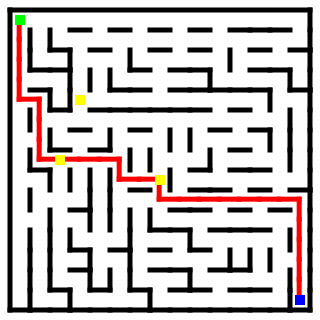

In [20]:
# Proveu el vostre algorisme!

# Creem un laberint i n'extraiem el graph
maze = Maze(15, 15, p_down=0.4, p_build=0, directed=True, seed=1)
G = maze.maze_graph()

# Punt inici i punt final
A = 0
B = len(G.nodes)-1
money_dict = {63: -10, 127: -10, 107:-100}

for k,v in money_dict.items():
    maze.set_value(k, v, color=(255,255,0))

# Cridem a la punció que heu creat
values = money(G, A, B, money_dict)
print('La distància del camí més curt és:', values['distance'])

# Mostrem el camí
maze.set_path(values['path'])
maze.display_maze(plot_path=True, height=300)

In [21]:
plt.figure(figsize=(10,10))

colorA, colorB, colorM, colorPTH, colorDEF = '#00ff00', '#0000ff', '#ffff00', '#ff0000', '#1f78b4'
color_map = [colorA if n==A else colorB if n==B else colorM if n in money_dict else colorPTH if n in values['path'] else colorDEF for n in G.nodes]

# NOTA: Els grafs dirigits tenen problemes a l'hora de dibuixar-se. El podem transformar a no dirigit només per
# agafar-ne les posicions dels nodes.
pos = nx.kamada_kawai_layout(G.to_undirected())

# Dibuixem el graf definint la posició, el color i la mida de cada node.
nx.draw(G, pos=pos, node_color=color_map, node_size=50)

ValueError: ('Contradictory paths found:', 'negative weights?')

<Figure size 720x720 with 0 Axes>

In [ ]:
# NO DEIXA DIBUIXAR-LO

<div class="alert alert-warning">
<h1>Resposta a les preguntes</h1>
<h3>Problema 1</h3>
<p>
    Prenem de referència la part de la relaxació (relaxar una distància és actualitzar-la reduint-la quan s'ha descobert un camí de distància inferior). Utilitzant el teorema d'Euler podem assegurar que la suma de tots els graus és $\Theta(E)$. I tenint en compte que la crida a l'actualització de la cua pot trigar com qualsevol inserció, $\Theta(\log(V))$, entre totes les relaxacions que fem ens queda una eficiència de l'ordre de $\mathcal{O}(E\log(V))$.
</p>   
<h3>Problema 2</h3>
<p>
    El cost d'aquest programa és dos vegades la complexitat d'una crida a la nostra implementació del Dijkstra. Per tant, és de l'ordre de $\mathcal{O}(E\log(V))$.
</p>   
<h3>Problema 3</h3>
<p>
    Fixem-nos que el càlcul de la complexitat sembla força complicat. Determinar-lo se'ns faria encara més difícil a causa de la compactitud del codi, si no ens fixéssim en l'ús de la funció "permutations" del paquet itertools. Aquesta ens determina totes les possibles tuples que sorgirien de fer tots els camins possibles, la qual cosa ja ens dona un ordre d'$\mathcal{O}(E!)$; per aquesta raó, podríem aproximar la complexitat de tot el codi a $\mathcal{O}(E!)$. Certament, aquesta implementació no és molt bona per a un gran nombre de dades.
</p>   
<h3>Problema 4</h3>
<p>
    En el pitjor dels casos, podem aproximar-ho $\mathcal{O}(E^2)$, $E$ essent el total de nodes. Fixem-nos: el primer for podria iterar sobre tots els nodes si la llista que li passéssim fos tot $E$. En el for aniuat, es podria donar el cas que tal node estigués connectat amb tota la xarxa del graf; cost $E$, també.
</p>   
<h3>Problema 5</h3>    
<p>
    No, ja que Dijkstra no treballa amb pesos negatius. En aquest cas, ens haurem de servir de l'algorisme de Bellman-Ford. Hem hagut de limitar les direccions permeses per diverses raons: (1) ens evitem entrar innecessàriament en cicles de pesos negatius, (2) ens estalviem comprovar els veïns del quadrant superior i l'esquerre.
</p>    
    
</div>

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>

<p>
L'entrega es farà a través del campus virtual. Teniu fins el dia <b>13 d'Octubre a les 23:55</b> per entregar la pràctica. A la tasca que obrirem al campus, <b>només heu d'entregar aquest fitxer .ipynb</b> (No entregueu maze.py ni cap altre fitxer extra). El notebook ha de tenir com a nom:
</p>
<p>
    <code>L2_Grup_Cognom_Nom.ipynb</code>
</p>
    <br>
On 'Grup' és una sola lletra que identifica el grup on esteu matriculats. Els grups disponibles són: A, B, C, F.

És imprescindible que respecteu el format de les funcions i que el vostre codi estigui degudament comentat.<br><br>
</div>